In [6]:
import pandas as pd

unroll2 = pd.read_csv("./unroll2.csv")
unroll4 = pd.read_csv("./unroll4.csv")
unroll2["time"] = unroll2["time"] * 1000
unroll4["time"] = unroll4["time"] * 1000

print(unroll2.to_latex(header=True, index=False, float_format="%.6f"))
print(unroll4.to_latex(header=True, index=False, float_format="%.6f"))

\begin{tabular}{lrr}
\toprule
algorithm & array_length & time \\
\midrule
plain & 128 & 0.006559 \\
plain & 256 & 0.007609 \\
plain & 512 & 0.010686 \\
plain & 1024 & 0.016271 \\
plain & 2048 & 0.027929 \\
plain & 4096 & 0.050567 \\
plain & 8192 & 0.094650 \\
plain & 16384 & 0.187550 \\
auto & 128 & 0.005934 \\
auto & 256 & 0.007867 \\
auto & 512 & 0.009683 \\
auto & 1024 & 0.012448 \\
auto & 2048 & 0.017198 \\
auto & 4096 & 0.026702 \\
auto & 8192 & 0.040245 \\
auto & 16384 & 0.070792 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
algorithm & array_length & time \\
\midrule
plain & 128 & 0.006743 \\
plain & 256 & 0.007537 \\
plain & 512 & 0.010506 \\
plain & 1024 & 0.016395 \\
plain & 2048 & 0.028561 \\
plain & 4096 & 0.049998 \\
plain & 8192 & 0.095330 \\
plain & 16384 & 0.186542 \\
auto & 128 & 0.006976 \\
auto & 256 & 0.007381 \\
auto & 512 & 0.009137 \\
auto & 1024 & 0.012384 \\
auto & 2048 & 0.018327 \\
auto & 4096 & 0.026211 \\
auto & 8192 & 0.040113 \\
auto & 16384

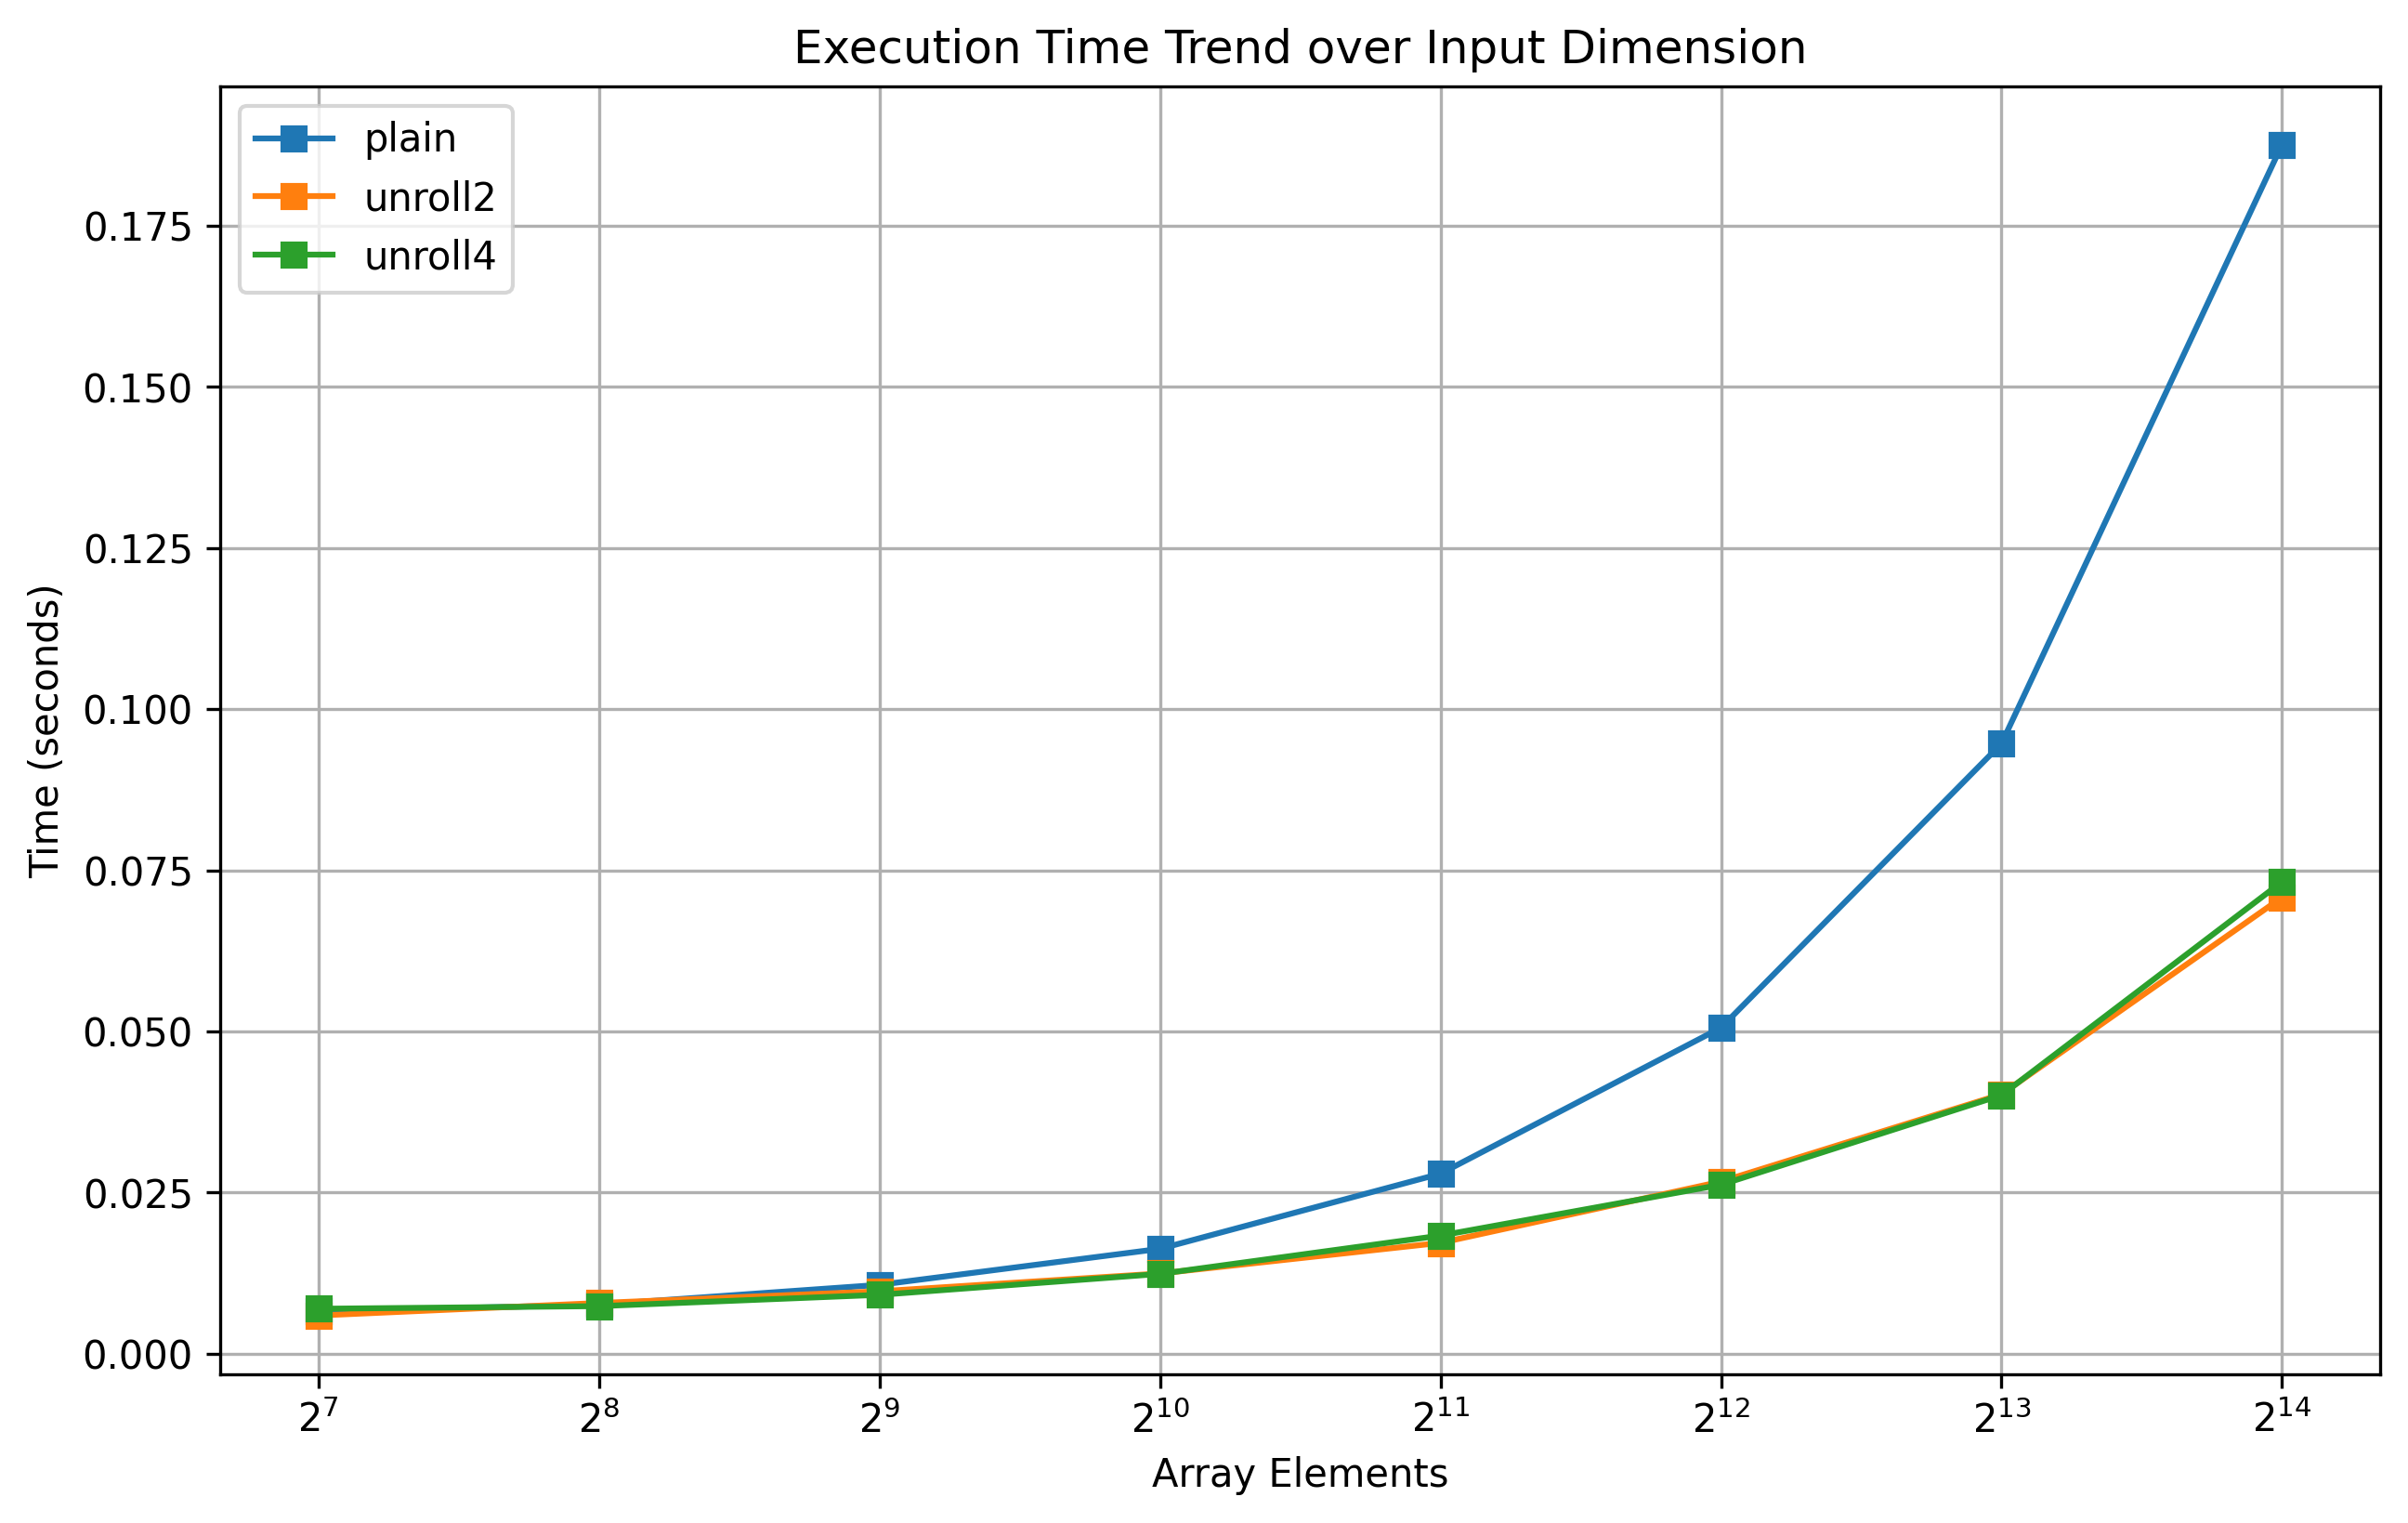

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")


tmp = unroll2[unroll2["algorithm"] == "plain"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="plain")

tmp = unroll2[unroll2["algorithm"] == "auto"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="unroll2")

tmp = unroll4[unroll4["algorithm"] == "auto"][["array_length", "time"]]
plt.plot(tmp["array_length"], tmp["time"], marker="s", label="unroll4")


plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [10]:
speed_ups = []
df = unroll4.copy()

algs = df["algorithm"].unique()
sizes = df["array_length"].unique()

for alg in algs:
    for s in sizes:
        mask_plain = (df["algorithm"] == "plain") & (df["array_length"] == s)
        mask = (df["algorithm"] == alg) & (df["array_length"] == s)

        time_plain = df[mask_plain]["time"].iloc[0]
        time_alg = df[mask]["time"].iloc[0]
        speed_ups.append(time_plain / time_alg)

df["speed_up"] = speed_ups
df

,algorithm,array_length,time,speed_up
0,plain,128,0.006743,1.000000
1,plain,256,0.007537,1.000000
2,plain,512,0.010506,1.000000
3,plain,1024,0.016395,1.000000
4,plain,2048,0.028561,1.000000
5,plain,4096,0.049998,1.000000
6,plain,8192,0.095330,1.000000
7,plain,16384,0.186542,1.000000
8,auto,128,0.006976,0.966612
9,auto,256,0.007381,1.021127


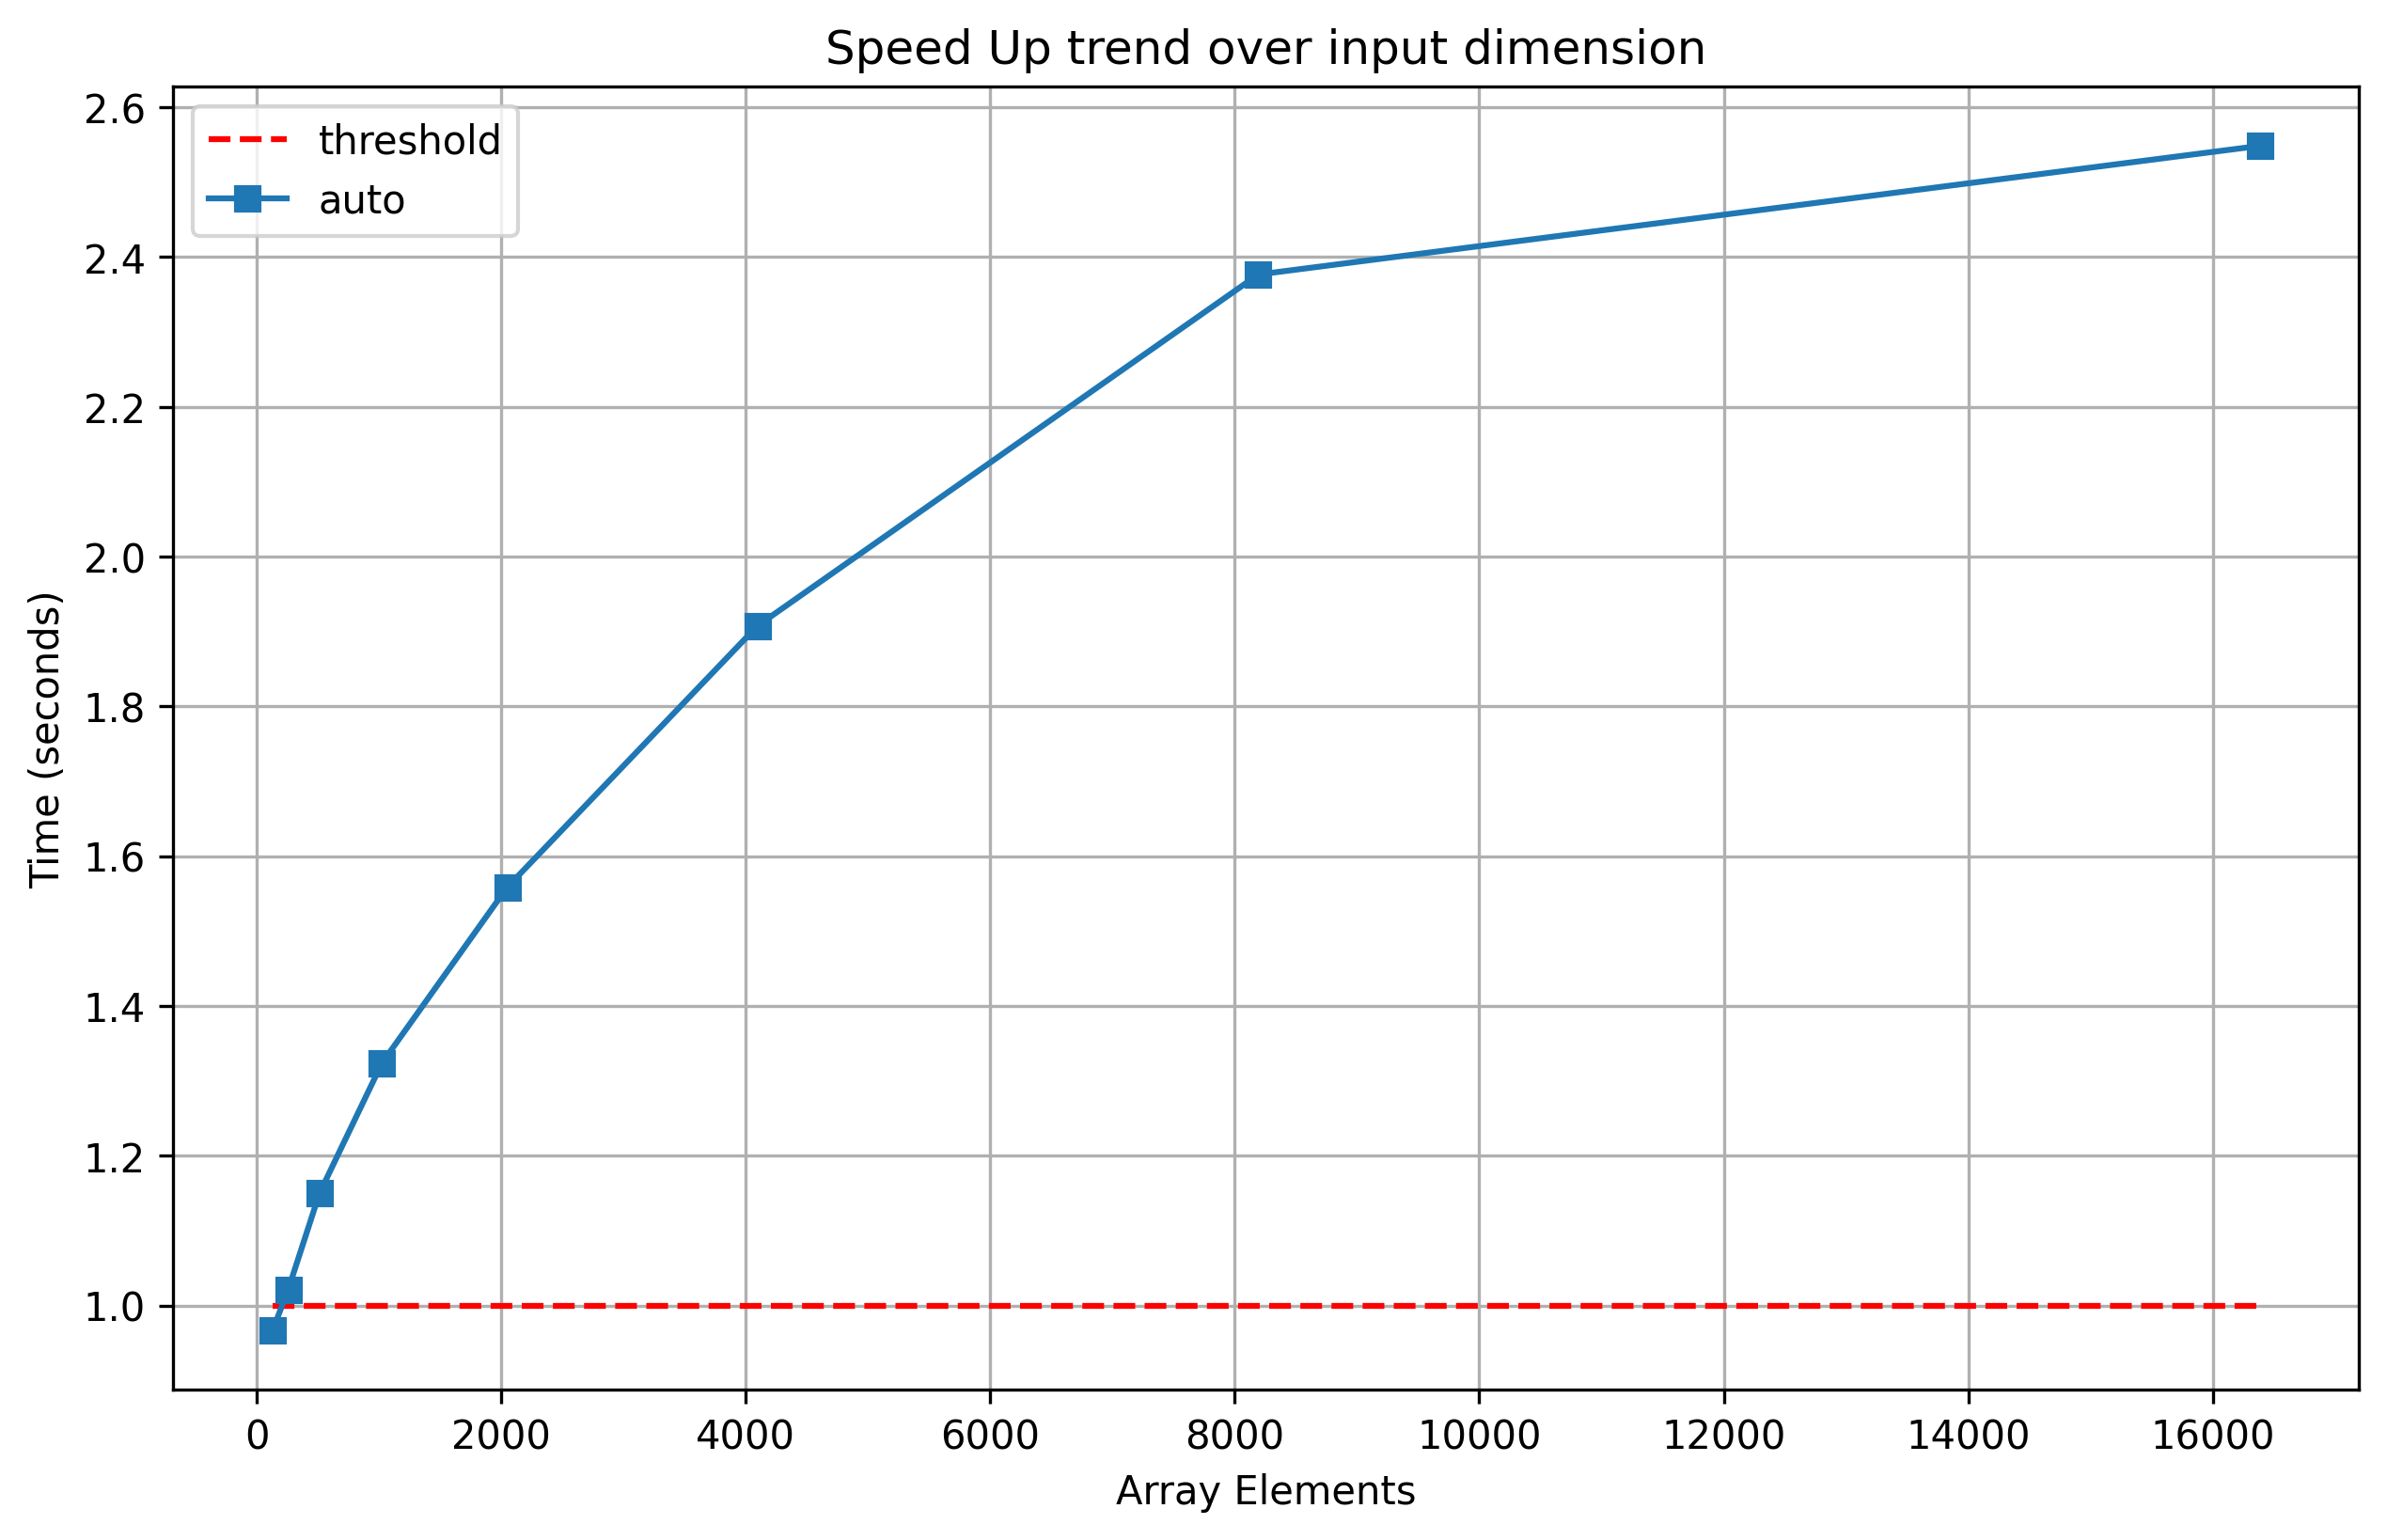

In [12]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up trend over input dimension")

plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")
for alg in algs:
    tmp = df[df["algorithm"] == alg][["array_length", "speed_up"]]
    if alg != "plain":
        plt.plot(tmp["array_length"], tmp["speed_up"], marker="s", label=alg)

plt.xlabel("Array Elements")
plt.ylabel("Time (seconds)")

# plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()